In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [11]:
df.keyword.value_counts()

fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [14]:
df['num_words'] = df.apply(lambda x : len(x['text'].split(" ")), axis =1)
df.head()

,id,keyword,location,text,target,num_words
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,9
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,17


In [17]:
#average words if target is 1
print("num average words if tagert is 1", df[df.target == 1].num_words.mean())
print("num average words if tagert is 0", df[df.target == 0].num_words.mean())
print("average number of words", df.num_words.mean())

## hence target is not dependent on  word length

num average words if tagert is 1 15.20116172424335
num average words if tagert is 0 14.723859972362966
average number of words 14.928937344016813


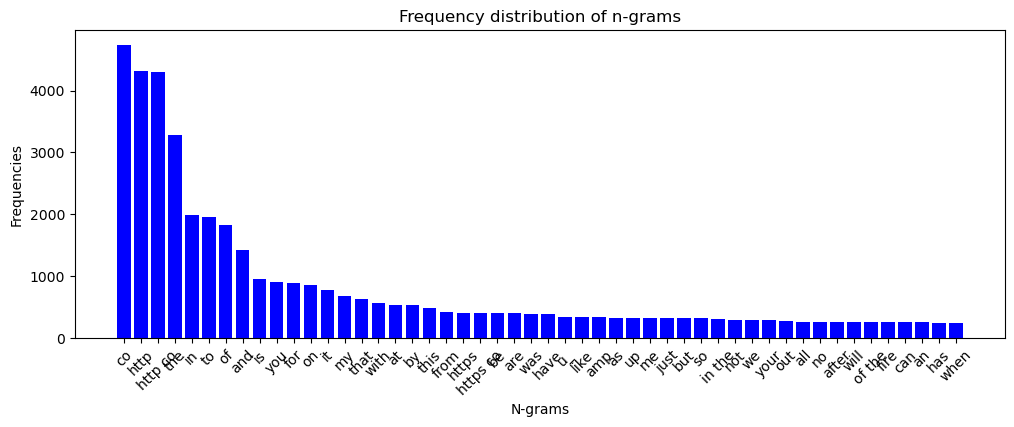

In [26]:
##frequency of distribution of words
kwargs = {'ngram_range': (1, 2),
            'dtype': 'int32',
            'strip_accents': 'unicode',
            'decode_error': 'replace',
            'analyzer': 'word'}
vectorizer = CountVectorizer(**kwargs)
vectorized_texts = vectorizer.fit_transform(np.array(df.text))
#list of all n-grams in index order of dictionary
all_ngrams = list(vectorizer.get_feature_names_out())
num_ngrams = min(50, len(all_ngrams))


all_counts = vectorized_texts.sum(axis=0).tolist()[0]
all_counts, all_ngrams = zip(*[(c, n) for c, n in sorted(zip(all_counts, all_ngrams), reverse=True)])
ngrams = list(all_ngrams)[:num_ngrams]
counts = list(all_counts)[:num_ngrams]

idx = np.arange(num_ngrams)
plt.figure(figsize=(12,4))
plt.bar(idx, counts, width=0.8, color='b')
plt.xlabel('N-grams')
plt.ylabel('Frequencies')
plt.title('Frequency distribution of n-grams')
plt.xticks(idx, ngrams, rotation=45)
plt.show()


# Data preprocessing
### We will do the following tasks :
1. Remove punctuation 
2. Remove stop words
3. Lowercase the text
4. Stemming
5. Tokenize the string
